In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('image', cmap='coolwarm', interpolation='none')

In [17]:
def sample_from_world():
    D = np.zeros((3, 3))
    if np.random.rand() < (2 / 3):
        idx = np.random.randint(0, 6)
        if idx == 0:
            D[:, [1, 2]] = 1
        elif idx == 1:
            D[:, [0, 2]] = 1
        elif idx == 2:
            D[:, [0, 1]] = 1
        elif idx == 3:
            D[:, 2] = 1
        elif idx == 4:
            D[:, 1] = 1
        elif idx == 5:
            D[:, 0] = 1
            
    else:
        idx = np.random.randint(0, 6)
        if idx == 0:
            D[[1, 2]] = 1
        elif idx == 1:
            D[[0, 2]] = 1
        elif idx == 2:
            D[[0, 1]] = 1
        elif idx == 3:
            D[2] = 1
        elif idx == 4:
            D[1] = 1
        elif idx == 5:
            D[0] = 1
        
    return D.ravel()[:, None]

In [176]:
sample_from_world().reshape((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.]])

In [19]:
epsilon_b = 0.01 # learning rate for the bias
epsilon_W = 0.01 # learning rate for the top layer
epsilon_V = 0.15 # learning rate fot he bottom layer

In [20]:
def add_ones(X):
    col = np.ones((1, X.shape[1]))
    return np.concatenate([X, col], axis=0)

In [21]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [22]:
def sample(p):
    x = np.random.rand(*p.shape) < p
    return x.astype(int)

In [23]:
def wake(V_G, W_G, b_G, V_R, W_R):
    # experience reality
    d = sample_from_world()
    
    # pass sense datum up through recognition network
    y = sample(sigmoid(np.dot(V_R, add_ones(d))))
    x = sample(sigmoid(np.dot(W_R, add_ones(y))))
    
    # pass back down through generative network and compute probabilities
    xi = sigmoid(b_G)
    psi = sigmoid(np.dot(W_G, add_ones(x)))
    delta = sigmoid(np.dot(V_G, add_ones(y)))
    
    # adjust generative weights
    b_G += epsilon_b * (x - xi)
    W_G += epsilon_W * np.dot(y - psi, add_ones(x).T)
    V_G += epsilon_V * np.dot(d - delta, add_ones(y).T)

In [24]:
def sleep(V_G, W_G, b_G, V_R, W_R):
    # initiate a "dream"
    x = sample(sigmoid(b_G))
    
    # pass down through generative network
    y = sample(sigmoid(np.dot(W_G, add_ones(x))))
    d = sample(sigmoid(np.dot(V_G, add_ones(y))))
    
    # pass back up through recognition network
    psi = sigmoid(np.dot(V_R, add_ones(d)))
    xi = sigmoid(np.dot(W_R, add_ones(y)))
    
    # adjust recognition weights
    V_R += epsilon_V * np.dot(y - psi, add_ones(d).T)
    W_R += epsilon_W * np.dot(x - xi, add_ones(y).T)

In [178]:
# generative weights
V_G = np.zeros((9, 7))
W_G = np.zeros((6, 2))
b_G = np.zeros((1, 1))

# recognition weights
V_R = np.zeros((6, 10))
W_R = np.zeros((1, 7))

In [195]:
# initiate a "dream"
x = sample(sigmoid(b_G))
    
# pass down through generative network
y = sample(sigmoid(np.dot(W_G, add_ones(x))))
d = sample(sigmoid(np.dot(V_G, add_ones(y))))

d.reshape((3, 3))

array([[1, 1, 0],
       [0, 0, 0],
       [0, 1, 0]])

<IPython.core.display.Javascript object>


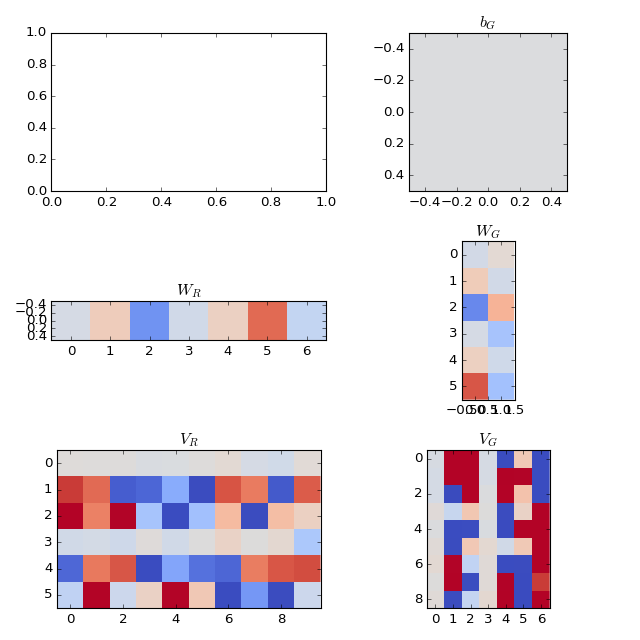

In [196]:
# set up plotting
fig, axes = plt.subplots(3, 2)
vmin = -5
vmax = 5
im_b_G = axes[0, 1].imshow(b_G, vmin=vmin, vmax=vmax)
axes[0, 1].set_title("$b_G$")
im_W_G = axes[1, 1].imshow(W_G, vmin=vmin, vmax=vmax)
axes[1, 1].set_title("$W_G$")
im_V_G = axes[2, 1].imshow(V_G, vmin=vmin, vmax=vmax)
axes[2, 1].set_title("$V_G$")
im_W_R = axes[1, 0].imshow(W_R, vmin=vmin, vmax=vmax)
axes[1, 0].set_title("$W_R$")
im_V_R = axes[2, 0].imshow(V_R, vmin=vmin, vmax=vmax)
axes[2, 0].set_title("$V_R$")
fig.set_size_inches(8, 8, forward=True)
plt.tight_layout()
plt.draw()
plt.show()

for i in range(60000):
    wake(V_G, W_G, b_G, V_R, W_R)
    sleep(V_G, W_G, b_G, V_R, W_R)
    if (i % 100) == 0:
        im_b_G.set_data(b_G)
        im_W_G.set_data(W_G)
        im_V_G.set_data(V_G)
        im_W_R.set_data(W_R)
        im_V_R.set_data(V_R)
        fig.canvas.draw()

In [208]:
# initiate a "dream"
x = sample(sigmoid(b_G))
    
# pass down through generative network
y = sample(sigmoid(np.dot(W_G, add_ones(x))))
d = sample(sigmoid(np.dot(V_G, add_ones(y))))

d.reshape((3, 3))

array([[0, 0, 0],
       [1, 1, 1],
       [0, 0, 0]])